For this implementation, we are going to use the advertising dataset. This is a dataset that gives us the total sales for different products, after marketing them on Television, Radio and Newspaper. Using our algorithm, we can find out which medium performs the best for our sales and assign weights to all the mediums accordingly. This dataset can be downloaded from the link given below:
https://www.kaggle.com/sazid28/advertising.csv

In [35]:
import numpy as np #used for mathematical operation
import pandas as pd  #used for mathematical operation as well as reading dataset
import matplotlib.pyplot as plt # used for plotting our findings and graphical result explanation
import seaborn as sns    # used for plotting our findings and graphical result explanation



In [36]:
# reading data:
dataFrame = pd.read_csv("Advertising.csv");
dataFrame.head
# dataFrame.size

<bound method NDFrame.head of      Unnamed: 0     TV  radio  newspaper  sales
0             1  230.1   37.8       69.2   22.1
1             2   44.5   39.3       45.1   10.4
2             3   17.2   45.9       69.3    9.3
3             4  151.5   41.3       58.5   18.5
4             5  180.8   10.8       58.4   12.9
..          ...    ...    ...        ...    ...
195         196   38.2    3.7       13.8    7.6
196         197   94.2    4.9        8.1    9.7
197         198  177.0    9.3        6.4   12.8
198         199  283.6   42.0       66.2   25.5
199         200  232.1    8.6        8.7   13.4

[200 rows x 5 columns]>

X would represent TV, Radio and Newspaper while Y would represent our sales. As all these sales might be on different scales, we then normalise our X & Y variables.

In [37]:
x = dataFrame[['TV','radio','newspaper']]
y = dataFrame['sales']
y=np.array((y-y.mean())/y.std())
x=x.apply(lambda rec:(rec-rec.mean())/rec.std(),axis=0)

y = np.array((y - y.mean()) / y.std()):

y is a NumPy array or a similar array-like structure containing numerical data.
y.mean() calculates the mean (average) of the elements in the array y.
y.std() calculates the standard deviation of the elements in the array y.
(y - y.mean()) / y.std() subtracts the mean from each element in y and then divides by the standard deviation, effectively standardizing the data.
np.array(...) converts the result back into a NumPy array and assigns it to the variable y.
x = x.apply(lambda rec: (rec - rec.mean()) / rec.std(), axis=0):

x is likely a DataFrame, possibly from the Pandas library, containing tabular data with multiple columns.
x.apply(...) applies a function to each column (axis 0) of the DataFrame x.
lambda rec: (rec - rec.mean()) / rec.std() is a lambda function that takes each column rec, subtracts its mean, and then divides by its standard deviation.
This function effectively standardizes each column of the DataFrame.
The result of applying this function to each column is assigned back to the DataFrame x.



Once we have a normalised dataset, we can start defining our algorithm. To implement a gradient descent algorithm we need to follow 4 steps:
Randomly initialize the bias and the weight theta
Calculate predicted value of y that is Y given the bias and the weight
Calculate the cost function from predicted and actual values of Y
Calculate gradient and the weights

In [38]:
import random
def initialize(dim):
    b=random.random()
    theta=np.random.rand(dim)
    return b,theta
b,theta=initialize(3)
print(f"Bias: {b}", f"Weights: {theta}")
# here we created a function initialize to generate random weights and biases

Bias: 0.2477786578792256 Weights: [0.43465631 0.68046988 0.783847  ]


In [39]:
def predictY(b,theta,x):
    return b + np.dot(x,theta)
yHat=predictY(b,theta,x)
yHat
yHat[0:5]
#here we predicted y values using y = h(thetaX)=b+theta1*x1+theta2*x2+theta3*x3

array([2.72543116, 0.98714157, 2.02242152, 2.1028057 , 0.84964592])

yHat is the predicted output value whereas Y will be the actual value. The difference between these will give us our cost function. Which will be calculate in our next function.

In [40]:
import math
def get_cost(y,yHat):
    difference=y-yHat
    return np.sum(np.dot(difference.T,difference))/len(y-difference)
yHat=predictY(b,theta,x)
get_cost(y,yHat)
# we will try to lessen the cost function 

0.9499743762256162

now we will try to update theta values:
The parameters passed to the function are
x,y : the input and output variable
y_hat: predicted value with current bias and weights
b_0,theta_0: current bias and weights
Learning rate: learning rate to adjust the update step

In [41]:
def update_theta(x,y,yHat,b_0,theta_o,learning_rate):
    db=(np.sum(yHat-y)*2)/len(y)
    dw=(np.dot((yHat-y),x)*2)/len(y)
    b_1=b_0-learning_rate*db
    theta_1=theta_o-learning_rate*dw
    return b_1,theta_1
print("After initialization -Bias: ",b,"theta: ",theta)
yHat=predictY(b,theta,x)
b,theta=update_theta(x,y,yHat,b,theta,0.01)
print("After first update -Bias: ",b,"theta: ",theta)
get_cost(y,yHat)

After initialization -Bias:  0.2477786578792256 theta:  [0.43465631 0.68046988 0.783847  ]
After first update -Bias:  0.24282308472164107 theta:  [0.43994711 0.67239778 0.76750657]


0.9499743762256162

In [42]:
def run_gradient_descent(x, y, alpha, num_iterations):
    b, theta = initialize(x.shape[1])
    iter_num = 0
    gd_iterations_df = pd.DataFrame(columns=['iteration', 'cost'])
    result_idx = 0
    
    for each_iter in range(num_iterations):
        yHat = predictY(b, theta, x)
        this_cost = get_cost(y, yHat)
        prev_b = b
        prev_theta = theta
        b, theta = update_theta(x, y, yHat, prev_b, prev_theta, alpha)
        
        if iter_num % 10 == 0:
            gd_iterations_df.loc[result_idx] = [iter_num, this_cost]
            result_idx = result_idx + 1
        iter_num += 1
    
    print("Final Estimate of b and theta:", b, theta)
    return gd_iterations_df, b, theta

gd_iterations_df, b, theta = run_gradient_descent(x, y, alpha=0.001, num_iterations=200)
# In this corrected version, I've addressed the following issues:

# Imported the necessary libraries (random, numpy, and pandas).
# Defined the missing functions (predict_y, update_theta, etc.).
# Fixed the indentation of the run_gradient_descent function and the lines inside the loop.
# Used correct quotation marks for column names in the DataFrame (' instead of ‘ and ’).
# This code should now execute correctly and run the gradient descent optimization process while tracking the cost values during iterations.







Final Estimate of b and theta: 0.427527540946895 [0.60794216 0.674926   0.48538107]


In [43]:
import random
import numpy as np
import pandas as pd

def initialize(dim):
    b = random.random()
    theta = np.random.rand(dim)
    return b, theta

def predict_y(b, theta, x):
    return b + np.dot(x, theta)

def get_cost(y, yHat):
    difference = y - yHat
    return np.sum(np.dot(difference.T, difference)) / len(y - difference)

def update_theta(x, y, yHat, prev_b, prev_theta, alpha):
    difference = yHat - y
    b_gradient = np.sum(difference) / len(y)
    theta_gradient = np.dot(x.T, difference) / len(y)
    updated_b = prev_b - alpha * b_gradient
    updated_theta = prev_theta - alpha * theta_gradient
    return updated_b, updated_theta

def run_gradient_descent(x, y, alpha, num_iterations):
    b, theta = initialize(x.shape[1])
    iter_num = 0
    gd_iterations_df = pd.DataFrame(columns=['iteration', 'cost'])
    result_idx = 0
    
    for each_iter in range(num_iterations):
        yHat = predict_y(b, theta, x)
        this_cost = get_cost(y, yHat)
        prev_b = b
        prev_theta = theta
        b, theta = update_theta(x, y, yHat, prev_b, prev_theta, alpha)
        
        if iter_num % 10 == 0:
            gd_iterations_df.loc[result_idx] = [iter_num, this_cost]
            result_idx = result_idx + 1
        iter_num += 1
    
    print("Final Estimate of b and theta:", b, theta)
    return gd_iterations_df, b, theta

gd_iterations_df, b, theta = run_gradient_descent(x, y, alpha=0.001, num_iterations=200)


Final Estimate of b and theta: 0.6898967112346817 [0.78256776 0.31301161 0.27482899]


we can see a decrase in cost function

In [44]:
gd_iterations_df[0:10]

,iteration,cost
0,0.0,0.922814
1,10.0,0.907263
2,20.0,0.892012
3,30.0,0.877054
4,40.0,0.862384
5,50.0,0.847997
6,60.0,0.833887
7,70.0,0.820048
8,80.0,0.806475
9,90.0,0.793164


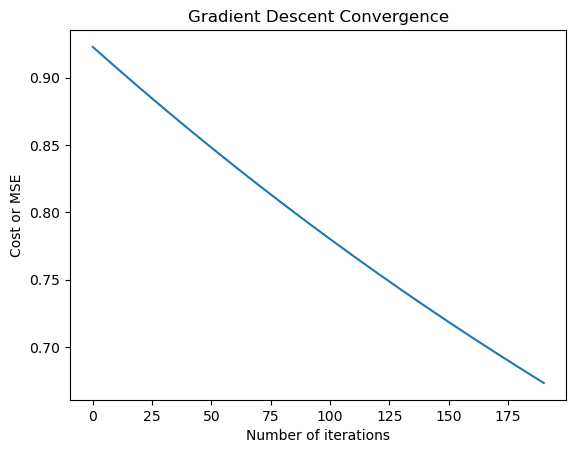

In [45]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(gd_iterations_df['iteration'], gd_iterations_df['cost'])
plt.xlabel("Number of iterations")
plt.ylabel("Cost or MSE")
plt.title("Gradient Descent Convergence")
plt.show()


As we can see the cost function decreases with increase in iterations, but we still have not reached convergence. Now, let’s try with α=0.01 for 2000 iterations and compare it with α=0.001 and find which learning rate is better for this dataset.

Final Estimate of b and theta: 1.3468002203938073e-09 [ 0.75306591  0.53648113 -0.00433026]
Final Estimate of b and theta: 0.013671523885197807 [0.64707386 0.54392984 0.06760601]


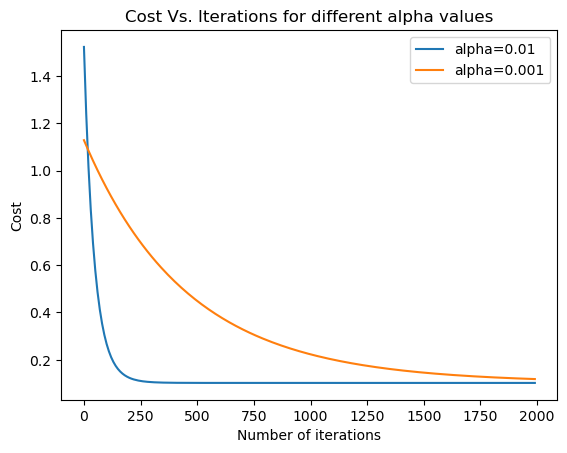

In [46]:
%matplotlib inline
import matplotlib.pyplot as plt

alpha_df_1, b, theta = run_gradient_descent(x, y, alpha=0.01, num_iterations=2000)
alpha_df_2, b, theta = run_gradient_descent(x, y, alpha=0.001, num_iterations=2000)

plt.plot(alpha_df_1['iteration'], alpha_df_1['cost'], label="alpha=0.01")
plt.plot(alpha_df_2['iteration'], alpha_df_2['cost'], label="alpha=0.001")

plt.legend()
plt.ylabel('Cost')
plt.xlabel('Number of iterations')
plt.title('Cost Vs. Iterations for different alpha values')

plt.show()


As one can see, 0.01 is the more optimal learning rate as it converges much quicker than 0.001. 0.01 converges around the 100 mark, while 0.001 takes 1000 iterations to reach convergence.
Hence, we have successfully built a gradient descent algorithm on python. Remember, the optimal value of learning rate will be different for each and every dataset.